In [21]:
import sys
sys.path.append('../')
from pykan.kan import *
import pandas as pd

In [22]:
model = KAN(width=[3,5,1], grid=5,k=3,seed=0)
model.to('cuda:0')

KAN(
  (biases): ModuleList(
    (0): Linear(in_features=5, out_features=1, bias=False)
    (1): Linear(in_features=1, out_features=1, bias=False)
  )
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)

In [23]:
all_data = pd.read_csv('event_data.csv')
all_data

,feature1,feature2,feature3,label
0,0.000000,0.000000,0.949158,0.0
1,0.000000,0.343203,0.187105,0.0
2,0.000000,0.379929,0.782518,0.0
3,0.000000,0.000000,0.689806,0.0
4,0.556977,0.747483,0.969616,0.0
...,...,...,...,...
995,0.000000,0.000000,0.459497,0.0
996,0.612375,0.000000,0.000000,0.0
997,0.000000,0.000000,0.000000,0.0
998,0.703196,0.000000,0.914242,0.0


In [24]:
train_data = all_data.sample(frac=0.8, random_state=200)
test_data = all_data.drop(train_data.index)

In [25]:

dataset = {}
dataset['train_label'] = torch.tensor(train_data[['label']].values.astype(np.float32)).reshape(-1,1)
dataset['train_input'] = torch.tensor(train_data.drop(['label'], axis = 1).values.astype(np.float32)) 
dataset['test_label'] = torch.tensor(test_data[['label']].values.astype(np.float32)).reshape(-1,1)
dataset['test_input'] = torch.tensor(test_data.drop(['label'], axis = 1).values.astype(np.float32))
 
dataset['train_input'].shape, dataset['train_label'].shape, dataset['test_input'].shape, dataset['test_label'].shape
dataset['train_input'] = dataset['train_input'].to('cuda:0')
dataset['train_label'] = dataset['train_label'].to('cuda:0')
dataset['test_input'] = dataset['test_input'].to('cuda:0')
dataset['test_label'] = dataset['test_label'].to('cuda:0')

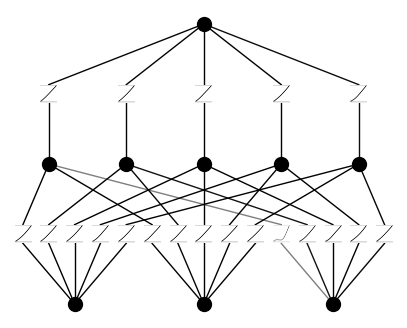

In [26]:
model(dataset['train_input'])
model.plot(beta=100)

In [27]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

train loss: 2.22e-01 | test loss: 2.51e-01 | reg: 2.86e+01 : 100%|██| 20/20 [00:23<00:00,  1.16s/it]


{'train_loss': [array(0.3055061, dtype=float32),
  array(0.3000564, dtype=float32),
  array(0.29706305, dtype=float32),
  array(0.28751096, dtype=float32),
  array(0.28338796, dtype=float32),
  array(0.28332442, dtype=float32),
  array(0.28272682, dtype=float32),
  array(0.28210002, dtype=float32),
  array(0.28125402, dtype=float32),
  array(0.2798186, dtype=float32),
  array(0.2783949, dtype=float32),
  array(0.27735254, dtype=float32),
  array(0.27481708, dtype=float32),
  array(0.27377412, dtype=float32),
  array(0.27238575, dtype=float32),
  array(0.26596138, dtype=float32),
  array(0.24182874, dtype=float32),
  array(0.23453277, dtype=float32),
  array(0.22948562, dtype=float32),
  array(0.22153227, dtype=float32)],
 'test_loss': [array(0.33501142, dtype=float32),
  array(0.32880217, dtype=float32),
  array(0.3265035, dtype=float32),
  array(0.31780723, dtype=float32),
  array(0.31374407, dtype=float32),
  array(0.3138915, dtype=float32),
  array(0.31318715, dtype=float32),
  arra

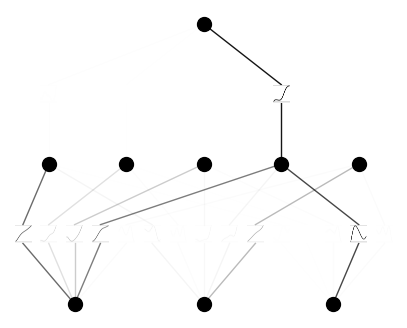

In [28]:
model.plot()

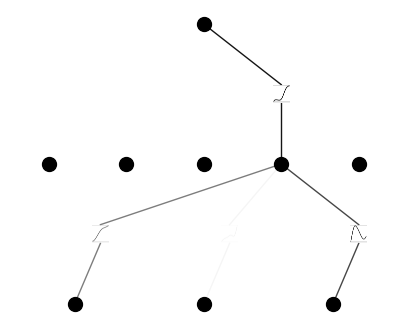

In [29]:
model.prune()
model.plot(mask=True)


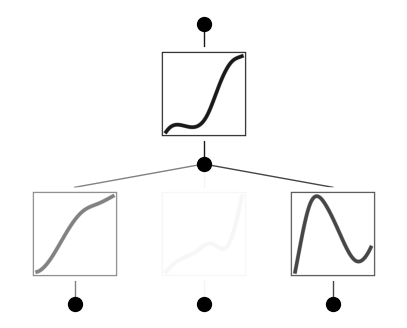

In [30]:
model = model.prune()
model(dataset['train_input'])
model.plot()